In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

%matplotlib inline

In [38]:
df = pd.read_csv('sfEnergyBenchmarks.csv', thousands=',')
df.columns

Index(['SFPUC Code', 'Facility', 'Notes', 'Dpt.', 'General Building Category',
       'Facility Type', 'ENERGY STAR Bldg Type', 'Year Built', 'Year Renov.',
       '2013 Building Area (sq. ft.)', '2013 Site EUI (kBtu/sq.ft.)',
       '2013 ENERGY STAR rating '],
      dtype='object')

In [3]:
eui = '2013 Site EUI (kBtu/sq.ft.)'
buildingArea = '2013 Building Area (sq. ft.)'
yearBuilt = 'Year Built'
buildingCategory = 'General Building Category'

## General Building Category Analysis

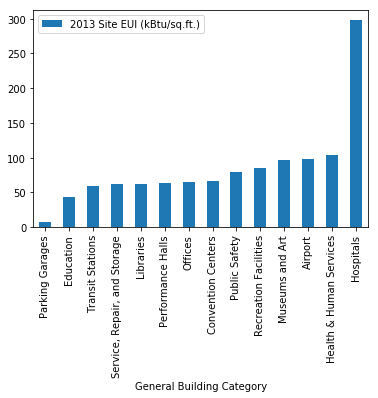

In [4]:
meanBuildingCategory_df = df.groupby([buildingCategory]).mean().reset_index().sort_values(eui)
meanBuildingCategory_df.plot(x=buildingCategory, y=eui, kind='bar')


## Hospital Category Analysis

In [5]:
hospital_df = df[df[buildingCategory].isin(['Hospitals'])]
hospital_df

,SFPUC Code,Facility,Notes,Dpt.,General Building Category,Facility Type,ENERGY STAR Bldg Type,Year Built,Year Renov.,2013 Building Area (sq. ft.),2013 Site EUI (kBtu/sq.ft.),2013 ENERGY STAR rating
211,192,San Francisco General Hospital,This location was under construction or vacant...,DPH,Hospitals,hospital,Hospital,1915.0,1976.0,1370904,376.6,NaN
212,191,Laguna Honda Hospital,Not qualified for ENERGY STAR rating for hospi...,DPH,Hospitals,hospital,Hospital,1926.0,2010.0,717126,219.1,N.Q.


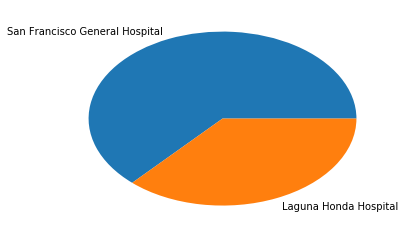

In [6]:
labels = hospital_df['Facility']
hospital_df.plot(kind='pie', labels=labels, y=eui, legend=False)
ax1 = plt.axes()
y_axis = ax1.yaxis
y_axis.label.set_visible(False)

## Health and Human Services

In [7]:
services_df = df[df[buildingCategory].isin(['Health & Human Services'])]
services_df.sort_values(eui, ascending=False).head()

,SFPUC Code,Facility,Notes,Dpt.,General Building Category,Facility Type,ENERGY STAR Bldg Type,Year Built,Year Renov.,2013 Building Area (sq. ft.),2013 Site EUI (kBtu/sq.ft.),2013 ENERGY STAR rating
190,784,Multi-Service Center South,NaN,HSA,Health & Human Services,homeless service,Other,1924.0,NaN,25600,278.0,NaN
210,743,Animal Shelter,NaN,ACC,Health & Human Services,veterinarian,Other,1931.0,1989.0,29500,234.2,NaN
191,785,Multi-Service Center North,NaN,HSA,Health & Human Services,homeless service,Other,1913.0,NaN,37125,177.3,NaN
194,184,Ocean Park Health Center (Health Center #5),NaN,DPH,Health & Human Services,medical clinic,Other,1967.0,2009.0,16247,169.9,NaN
195,186,San Francisco City Clinic,NaN,DPH,Health & Human Services,medical clinic,Other,1930.0,NaN,8000,148.9,NaN


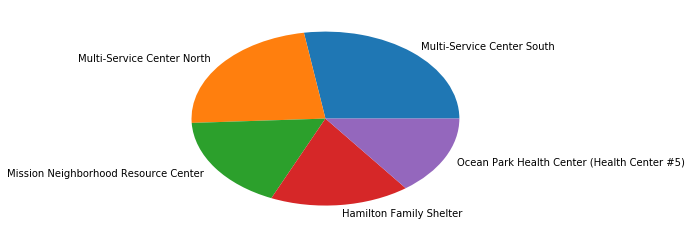

In [8]:
servicesLabel = services_df['Facility'].head()
services_df.sort_values(eui, ascending=False).head().plot(kind='pie', y=eui, labels=servicesLabel, legend=False)
ax1 = plt.axes()
y_axis = ax1.yaxis
y_axis.label.set_visible(False)

## Museum Category

In [9]:
museum_df = df[df[buildingCategory].isin(['Museums and Art'])]
museum_df.sort_values(eui, ascending=False).head()

,SFPUC Code,Facility,Notes,Dpt.,General Building Category,Facility Type,ENERGY STAR Bldg Type,Year Built,Year Renov.,2013 Building Area (sq. ft.),2013 Site EUI (kBtu/sq.ft.),2013 ENERGY STAR rating
13,236,California Palace of the Legion of Honor,NaN,FAMSF,Museums and Art,museum,Other,1924.0,1995.0,117665,282.7,NaN
14,293,GGP -- Conservatory of Flowers,"Facilities in Golden Gate Park, in cases where...",RPD,Museums and Art,museum,Other,1879.0,2003.0,27900,212.2,NaN
15,1333,Asian Art Museum,NaN,AAM,Museums and Art,museum,Other,1917.0,2003.0,185000,194.0,NaN
16,237,De Young Museum,NaN,FAMSF,Museums and Art,museum,Other,2005.0,NaN,292500,180.1,NaN
17,697,California Academy of Sciences,NaN,CAS,Museums and Art,museum,Other,2008.0,NaN,426000,147.5,NaN


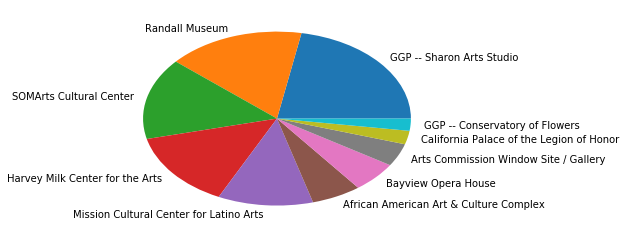

In [10]:
museumLabel = museum_df['Facility'].head(10)
museum_df.sort_values(eui, ascending=False).head(10).plot(kind='pie', y=eui, labels=museumLabel, legend=False)
ax1 = plt.axes()
y_axis = ax1.yaxis
y_axis.label.set_visible(False)

## Recreation Facilities

In [39]:
recreation_df = df[df[buildingCategory].isin(['Recreation Facilities'])]
recreation_df.sort_values(eui, ascending=False).head()

,SFPUC Code,Facility,Notes,Dpt.,General Building Category,Facility Type,ENERGY STAR Bldg Type,Year Built,Year Renov.,2013 Building Area (sq. ft.),2013 Site EUI (kBtu/sq.ft.),2013 ENERGY STAR rating
388,391,GGP -- Murphy Millwright's Cottage,NaN,RPD,Recreation Facilities,park building,Other,1904.0,2011.0,2960,617.9,NaN
379,382,Rossi Swimming Pool and Playground,NaN,RPD,Recreation Facilities,pool,Other,1958.0,NaN,15162,433.3,NaN
380,336,Charlie Sava Swimming Pool / Larsen Park,NaN,RPD,Recreation Facilities,pool,Other,1957.0,2008.0,12900,433.1,NaN
381,701,Coffman Pool / Herz Clubhouse and Playground,NaN,RPD,Recreation Facilities,pool,Other,1957.0,2008.0,12289,378.2,NaN
389,409,SF Zoo,NaN,RPD,Recreation Facilities,zoo,Other,1930.0,NaN,65799,356.4,NaN


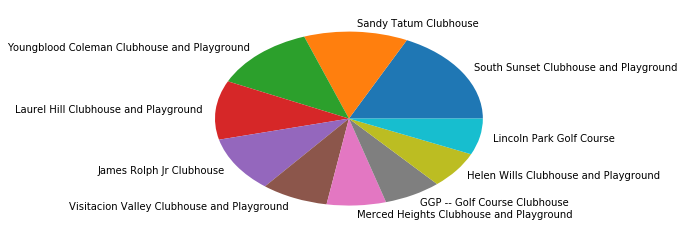

In [12]:
recreation_label = recreation_df['Facility'].head(10)
qx = recreation_df.sort_values(eui, ascending=False).head(10).plot(kind='pie', y=eui, labels=recreation_label, legend=False)
ax1 = plt.axes()
y_axis = ax1.yaxis
y_axis.label.set_visible(False)

## Education

In [13]:
education_df = df[df[buildingCategory].isin(['Education'])]
recreation_df.sort_values(eui, ascending=False).head()

,SFPUC Code,Facility,Notes,Dpt.,General Building Category,Facility Type,ENERGY STAR Bldg Type,Year Built,Year Renov.,2013 Building Area (sq. ft.),2013 Site EUI (kBtu/sq.ft.),2013 ENERGY STAR rating
388,391,GGP -- Murphy Millwright's Cottage,NaN,RPD,Recreation Facilities,park building,Other,1904.0,2011.0,2960,617.9,NaN
379,382,Rossi Swimming Pool and Playground,NaN,RPD,Recreation Facilities,pool,Other,1958.0,NaN,15162,433.3,NaN
380,336,Charlie Sava Swimming Pool / Larsen Park,NaN,RPD,Recreation Facilities,pool,Other,1957.0,2008.0,12900,433.1,NaN
381,701,Coffman Pool / Herz Clubhouse and Playground,NaN,RPD,Recreation Facilities,pool,Other,1957.0,2008.0,12289,378.2,NaN
389,409,SF Zoo,NaN,RPD,Recreation Facilities,zoo,Other,1930.0,NaN,65799,356.4,NaN


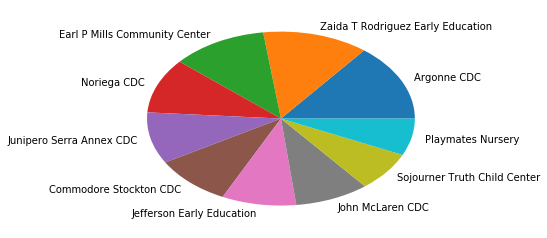

In [14]:
education_label = education_df['Facility'].head(10)
qx = education_df.sort_values(eui, ascending=False).head(10).plot(kind='pie', y=eui, labels=education_label, legend=False)
ax1 = plt.axes()
y_axis = ax1.yaxis
y_axis.label.set_visible(False)

In [15]:
bySchoolType = education_df.groupby('Facility Type').mean()
bySchoolType

,Year Built,Year Renov.,2013 Building Area (sq. ft.),2013 Site EUI (kBtu/sq.ft.)
Facility Type,,,,
Childcare/Nursery School,1956.133333,1953.00,20121.600000,42.933333
K-12 School,1946.189189,1953.25,72815.063063,41.128829
childcare/nursery school,1971.000000,NaN,9323.250000,32.925000
college/adult education,1961.769231,2006.00,143615.000000,68.592308


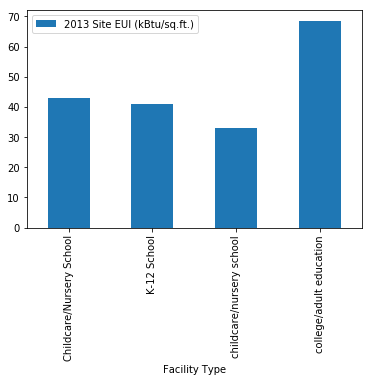

In [16]:
bySchoolType.plot(y=eui, kind='bar')

## Build Year Analysis

In [17]:
df['Year Renov.'].fillna(df[yearBuilt], inplace=True)
constructionYear_df = df.rename(columns={'Year Renov.': 'Year Built/Renovated'})

In [18]:
buildYear_df = constructionYear_df.groupby(['Year Built/Renovated']).mean()
labels = [
    '1880-1889',
    '1890-1899',
    '1900-1909', 
    '1910-1919', 
    '1920-1929', 
    '1930-1939',
    '1940-1949', 
    '1950-1959', 
    '1960-1969',
    '1970-1979',
    '1980-1989',
    '1990-1999',
    '2000-2009',]
df['year_range'] = pd.cut(constructionYear_df['Year Built/Renovated'], range(1880, 2011, 10), right=False, labels=labels)
byYear = df.groupby(['year_range']).mean()
byYear

,Year Built,Year Renov.,2013 Building Area (sq. ft.),2013 Site EUI (kBtu/sq.ft.)
year_range,,,,
1880-1889,1888.000000,1888.000000,14000.000000,8.800000
1890-1899,1895.000000,1895.000000,12300.000000,40.800000
1900-1909,1904.800000,1904.800000,17334.800000,58.760000
1910-1919,1912.826087,1912.826087,34816.304348,51.686957
1920-1929,1924.146341,1924.756098,60754.536585,51.414634
1930-1939,1932.625000,1933.375000,72273.156250,60.528125
1940-1949,1944.941176,1944.941176,131913.823529,58.005882
1950-1959,1952.213115,1954.180328,337722.557377,61.996721
1960-1969,1962.062500,1964.718750,91304.593750,46.437500


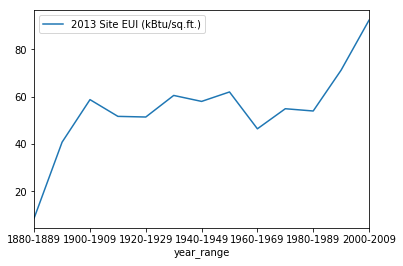

In [19]:
byYear.plot(y=eui)

## Multiple Regression Analysis of EUI

In [35]:
filtered_df = df[df[buildingArea] < 200000]
filtered_df = filtered_df[pd.notnull(filtered_df[yearBuilt])]
y = filtered_df[eui].astype(float)
X = filtered_df[[buildingArea, yearBuilt]].astype(float)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     2013 Site EUI (kBtu/sq.ft.)   R-squared:                       0.012
Model:                                     OLS   Adj. R-squared:                  0.007
Method:                          Least Squares   F-statistic:                     2.438
Date:                         Sun, 01 Oct 2017   Prob (F-statistic):             0.0886
Time:                                 01:04:08   Log-Likelihood:                -2306.0
No. Observations:                          414   AIC:                             4618.
Df Residuals:                              411   BIC:                             4630.
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          340.8398    212.002      1.608      0.109     -75.903     757.583
2013 Building Area (sq. ft.)    -0.0001   7.91e-05     -1.782      0.076      -0.000    1.45e-05
Year Built                      -0.1387      0.109     -1.277      0.202      -0.352       0.075
==============================================================================
Omnibus:                      357.177   Durbin-Watson:                   0.690
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7734.034
Skew:                           3.665   Prob(JB):                         0.00
Kurtosis:                      22.865   Cond. No.                     3.59e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

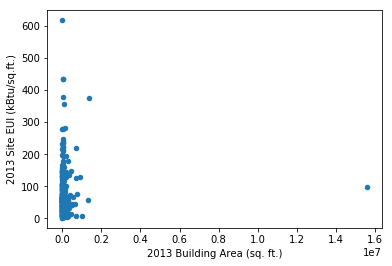

In [30]:
df.plot.scatter(x=buildingArea, y=eui)

## Regressional Analysis of Build Year

In [31]:
noNull_df = constructionYear_df[pd.notnull(constructionYear_df['Year Built/Renovated'])]
noNull_df
eui_df = noNull_df[[eui]].astype(float)
yearBuilt_df = noNull_df[['Year Built/Renovated']].astype(float)
model = sm.OLS(eui_df, yearBuilt_df).fit()
predictions = model.predict(eui_df)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     2013 Site EUI (kBtu/sq.ft.)   R-squared:                       0.507
Model:                                     OLS   Adj. R-squared:                  0.506
Method:                          Least Squares   F-statistic:                     469.3
Date:                         Sun, 01 Oct 2017   Prob (F-statistic):           4.02e-72
Time:                                 01:03:40   Log-Likelihood:                -2556.4
No. Observations:                          458   AIC:                             5115.
Df Residuals:                              457   BIC:                             5119.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Year Built/Renovated     0.0331      0.002     21.664      0.000       0.030       0.036
==============================================================================
Omnibus:                      384.680   Durbin-Watson:                   0.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7920.624
Skew:                           3.591   Prob(JB):                         0.00
Kurtosis:                      22.065   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

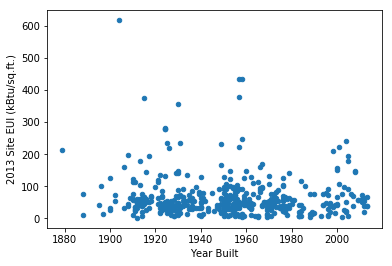

In [331]:
df.plot.scatter(x=yearBuilt, y=eui)